# Initial EDA assignment

### Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset with panda

In [2]:
df = pd.read_csv("unit02-auto-mpg.csv")

### Display 5 first line of the dataset

In [3]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:

df = df.drop('car name', axis=1)
df.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model year  origin
9.0   8          304.0         193         4732    18.5          70          1         1
27.0  4          151.0         90          2950    17.3          82          1         1
                 140.0         86          2790    15.6          82          1         1
                 112.0         88          2640    18.6          82          1         1
                 101.0         83          2202    15.3          76          2         1
                                                                                      ..
18.6  6          225.0         110         3620    18.7          78          1         1
18.5  8          360.0         150         3940    13.0          79          1         1
      6          250.0         98          3525    19.0          77          1         1
                               110         3645    16.2          76          1         1
46.6  4          86.0          65          2110    17.9          80          3         1
Name: count, Length: 398, dtype: int64

### Display 3 last line of the dataset

In [6]:
df.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1
397,31.0,4,119.0,82,2720,19.4,82,1


### Display metrics tables for numerical attributes in the dataset

### Display amount of rows and columns in the dataset

In [7]:
df.shape

(398, 8)

<Axes: >

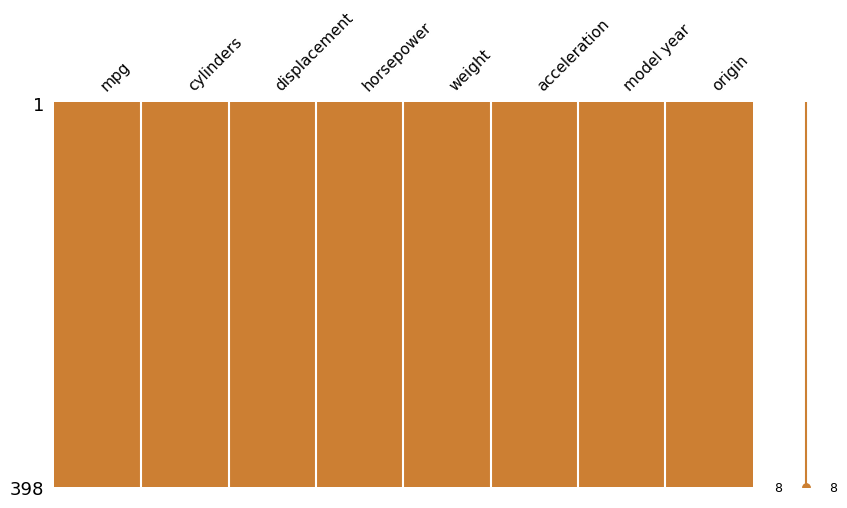

In [8]:
msno.matrix(df, figsize=(10,5), fontsize=11, color=(0.8, 0.5, 0.2))

<Axes: >

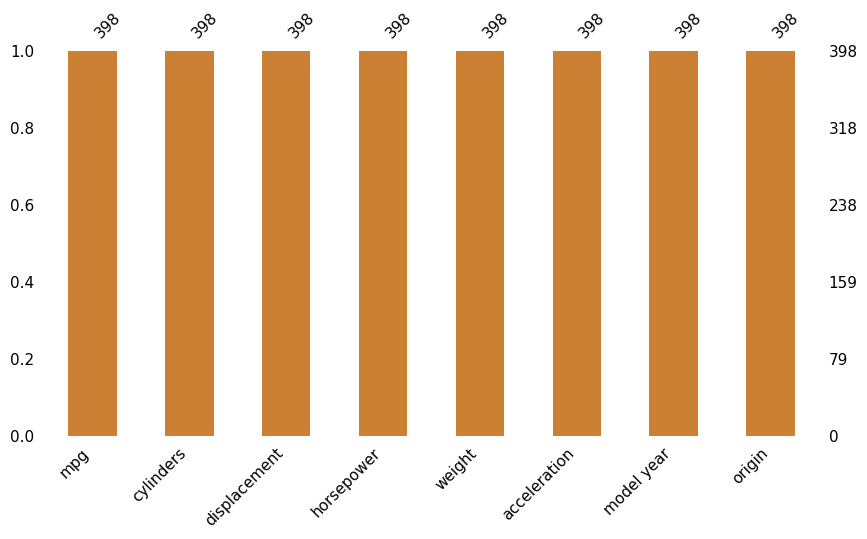

In [9]:
msno.bar(df, figsize=(10,5), fontsize=11, color=(0.8, 0.5, 0.2))

In [10]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [12]:
for col in df.columns:
  attr = df[col]
  print(f"\n{col} has count: {np.sort(np.unique(attr.count()))}")
  print(f"Total duplicates: {attr.duplicated().sum()}")
  print(np.sort(attr.unique()))



mpg has count: [398]
Total duplicates: 269
[ 9.  10.  11.  12.  13.  14.  14.5 15.  15.5 16.  16.2 16.5 16.9 17.
 17.5 17.6 17.7 18.  18.1 18.2 18.5 18.6 19.  19.1 19.2 19.4 19.8 19.9
 20.  20.2 20.3 20.5 20.6 20.8 21.  21.1 21.5 21.6 22.  22.3 22.4 22.5
 23.  23.2 23.5 23.6 23.7 23.8 23.9 24.  24.2 24.3 24.5 25.  25.1 25.4
 25.5 25.8 26.  26.4 26.5 26.6 26.8 27.  27.2 27.4 27.5 27.9 28.  28.1
 28.4 28.8 29.  29.5 29.8 29.9 30.  30.5 30.7 30.9 31.  31.3 31.5 31.6
 31.8 31.9 32.  32.1 32.2 32.3 32.4 32.7 32.8 32.9 33.  33.5 33.7 33.8
 34.  34.1 34.2 34.3 34.4 34.5 34.7 35.  35.1 35.7 36.  36.1 36.4 37.
 37.2 37.3 37.7 38.  38.1 39.  39.1 39.4 40.8 40.9 41.5 43.1 43.4 44.
 44.3 44.6 46.6]

cylinders has count: [398]
Total duplicates: 393
[3 4 5 6 8]

displacement has count: [398]
Total duplicates: 316
[ 68.   70.   71.   72.   76.   78.   79.   80.   81.   83.   85.   86.
  88.   89.   90.   91.   96.   97.   97.5  98.  100.  101.  104.  105.
 107.  108.  110.  111.  112.  113.  114.  1

In [13]:
numeric_car_dt = df.select_dtypes(include=[np.number])
skew_values = numeric_car_dt.skew()
kurt_values = numeric_car_dt.kurt()

skew_values, kurt_values

(mpg             0.457066
 cylinders       0.526922
 displacement    0.719645
 weight          0.531063
 acceleration    0.278777
 model year      0.011535
 origin          0.923776
 dtype: float64,
 mpg            -0.510781
 cylinders      -1.376662
 displacement   -0.746597
 weight         -0.785529
 acceleration    0.419497
 model year     -1.181232
 origin         -0.817597
 dtype: float64)

# Univariate Analysis


mpg
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


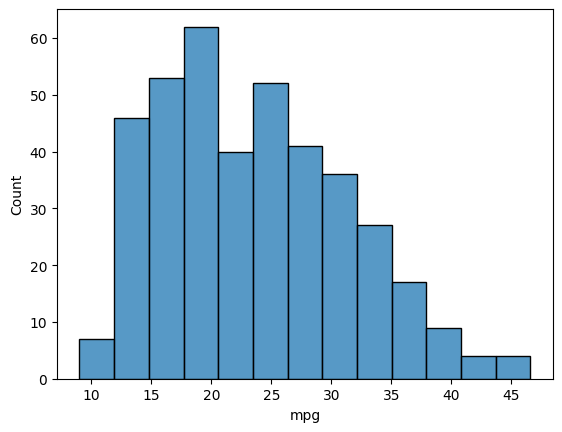


cylinders
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64


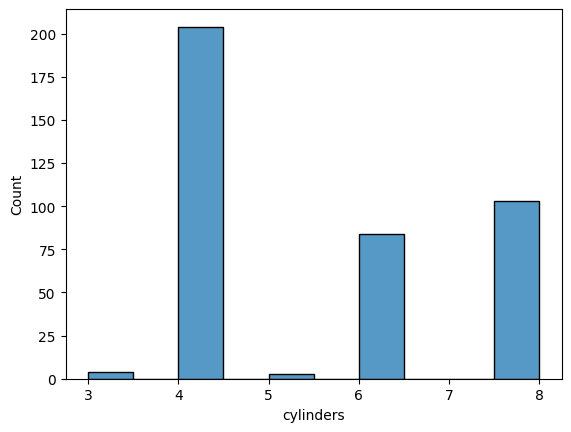


displacement
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64


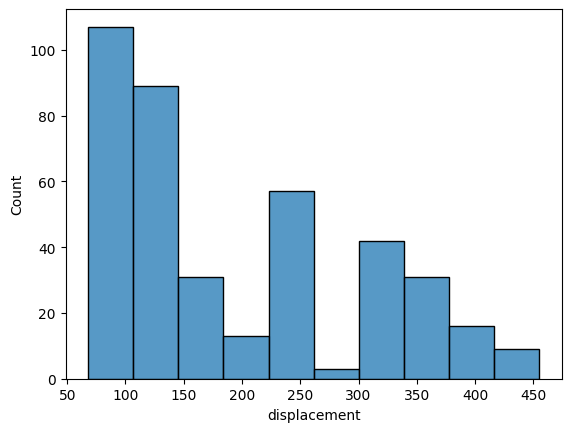


horsepower
count     398
unique     94
top       150
freq       22
Name: horsepower, dtype: object


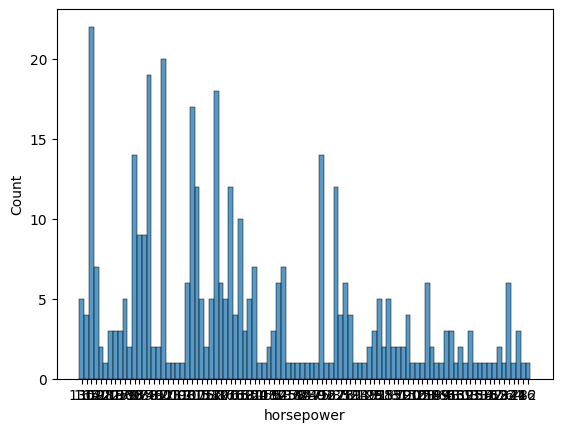


weight
count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64


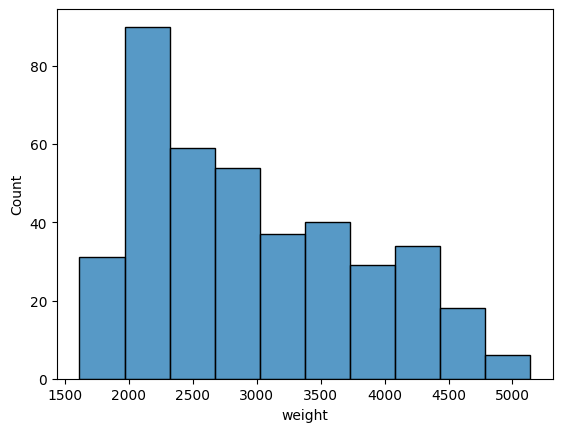


acceleration
count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64


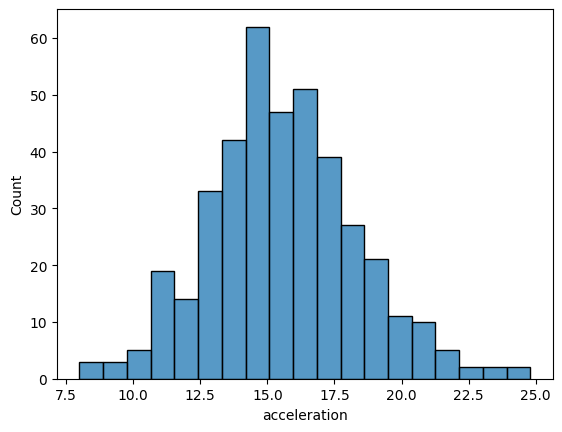


model year
count    398.000000
mean      76.010050
std        3.697627
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model year, dtype: float64


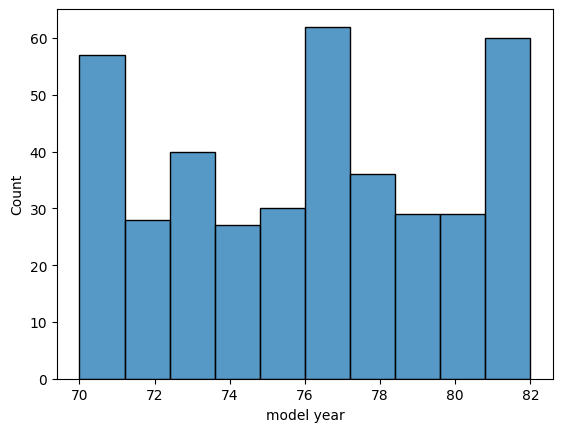


origin
count    398.000000
mean       1.572864
std        0.802055
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64


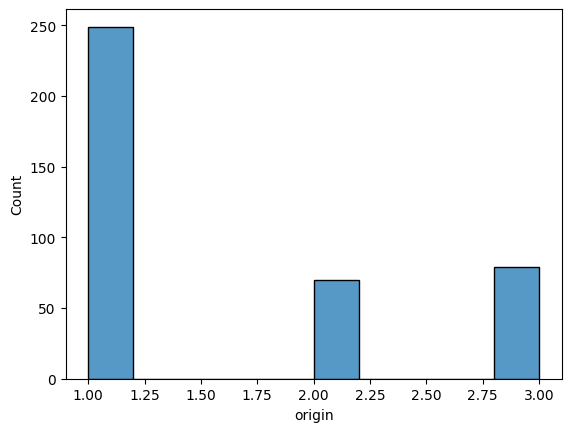

In [14]:
def showColumnData(column):
  print(f"\n{column}")
  print(f"{df[column].describe()}")
  sns.histplot(df[column])
  plt.show()


for col in df.columns:
  showColumnData(col)


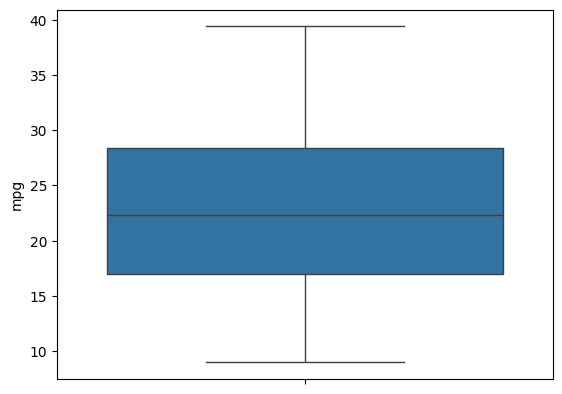

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [18]:
df_without_outliers = df[df['mpg'] <= 40]
sns.boxplot(data=df_without_outliers['mpg'])
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# print(f"Q1: {Q1}")
# print(f"Q3: {Q3}")

df_without_outliers = df[df['mpg'] <= 40]
df_without_outliers = df_without_outliers[df_without_outliers['mpg'] > 10]

#df_without_outliers['mpg'] = np.log10(df_without_outliers['mpg']+0.1)
sns.histplot(data=df_without_outliers['mpg'])
plt.show()



# Bivariate Analysis

In [ ]:
# Delete question mark found in column horse power by converting to int type
# Replace 0 values with mean horse power
df['horsepower'] = df['horsepower'].replace('?', '0')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
hp_mean = df.loc[:, 'horsepower'].mean()
df['horsepower'] = df['horsepower'].replace(np.nan, hp_mean)

print(df.horsepower.describe())

In [ ]:
sns.heatmap(df.corr(), annot=True,  cmap='Oranges')
plt.show()

In [ ]:
sns.set()
# Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
#        'acceleration', 'model year', 'origin'],
#       dtype='object')
columns = ['mpg','cylinders','displacement','horsepower','weight','model year','origin']
sns.pairplot(df[columns],height = 2 ,kind ='scatter',diag_kind='auto')
plt.show()

# Multivariate Analysis